## 1. Importing necessary libraries

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from sklearn.linear_model import LogisticRegression

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## 2. Prepare data

### 2.1. Load data

In [ ]:
train_file = "/content/drive/MyDrive/sentiment-analysis-for-movie-reviews/DataPreprocessing/TrainingSet_orig_eda_embedding_wordnet.csv"
test_file = "/content/drive/MyDrive/sentiment-analysis-for-movie-reviews/DataPreprocessing/TestSet_orig_eda_embedding_wordnet.csv"

df_train = pd.read_csv(train_file)
df_test = pd.read_csv(test_file)

### 2.2. TF-IDF Vectorizaton

In [ ]:
X_train = df_train['sentence']
y_train = df_train['label']

X_test = df_test['sentence']
y_test = df_test['label']

vectorizer = TfidfVectorizer(max_features=5000)
X_train_tfidf = vectorizer.fit_transform(X_train)
X_test_tfidf = vectorizer.transform(X_test)

## 3. Model training

### 3.1 Default parameter values

In [ ]:
logistic_model = LogisticRegression(random_state=0)
logistic_model.fit(X_train_tfidf, y_train)

LogisticRegression(random_state=0)

In [ ]:
y_pred_train = logistic_model.predict(X_train_tfidf)
y_pred_test = logistic_model.predict(X_test_tfidf)

In [ ]:
accuracy_train = accuracy_score(y_train,y_pred_train)
accuracy_test = accuracy_score(y_test, y_pred_test)
print(f"Train: {accuracy_train:.4f}")
print(f"Test: {accuracy_test:.4f}")

Train: 0.8504
Test: 0.7959


## 3.2 Hyperparameter tuning

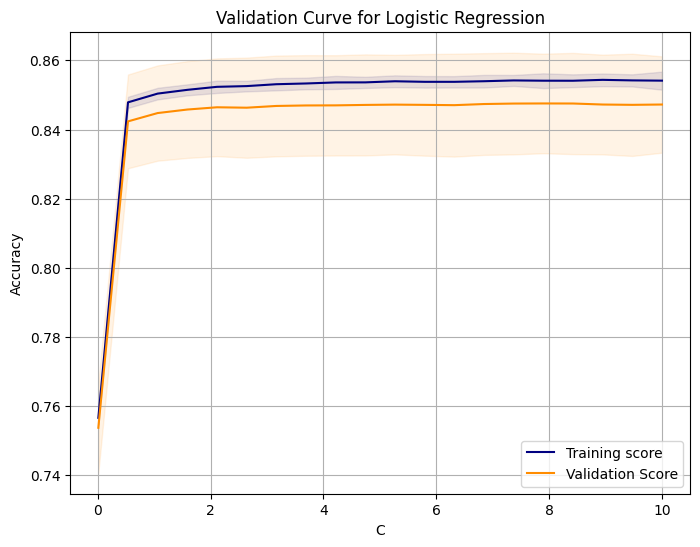

In [ ]:
from sklearn.model_selection import validation_curve
from sklearn.linear_model import LogisticRegression
import numpy as np
import matplotlib.pyplot as plt

param_range = np.linspace(0.01, 10, 20)

train_scores, test_scores = validation_curve(
    LogisticRegression(random_state=0, max_iter=1000), X_train_tfidf, y_train,
    param_name="C", param_range=param_range, cv=10, scoring="accuracy", n_jobs=-1
)

train_mean = np.mean(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)

plt.figure(figsize=(8, 6))
plt.plot(param_range, train_mean, label="Training score", color="navy")
plt.plot(param_range, test_mean, label="Validation Score", color="darkorange")
plt.fill_between(param_range, train_mean - np.std(train_scores, axis=1),
                 train_mean + np.std(train_scores, axis=1), color="navy", alpha=0.1)
plt.fill_between(param_range, test_mean - np.std(test_scores, axis=1),
                 test_mean + np.std(test_scores, axis=1), color="darkorange", alpha=0.1)
plt.xlabel("C")
plt.ylabel("Accuracy")
plt.legend(loc="best")
plt.title("Validation Curve for Logistic Regression")
plt.grid(True)
plt.show()


In [ ]:
import numpy as np
from scipy.stats import loguniform
from sklearn.model_selection import GridSearchCV
import matplotlib.pyplot as plt

In [ ]:
param_grid = {
    'penalty': ['l2'],
    'solver': ['saga'],
    'C': np.arange(0.5, 2.5, 20),
    'max_iter': [1000]
}

In [ ]:
model = LogisticRegression(random_state=0)
grid = GridSearchCV(
    model,
    param_grid=param_grid,
    cv=3,
    verbose=2,
    n_jobs=-1
)
grid.fit(X_train_tfidf, y_train)

print("Best cross-validation score: ", grid.best_score_)
print("Best parameter: ", grid.best_params_)

Fitting 3 folds for each of 1 candidates, totalling 3 fits
Best cross-validation score:  0.8409170211660245
Best parameter:  {'C': np.float64(0.5), 'max_iter': 1000, 'penalty': 'l2', 'solver': 'saga'}


In [ ]:
logistic_model = LogisticRegression(random_state=0, C = 0.5)
logistic_model.fit(X_train_tfidf, y_train)

y_pred_train = logistic_model.predict(X_train_tfidf)
y_pred_test = logistic_model.predict(X_test_tfidf)

accuracy_train = accuracy_score(y_train,y_pred_train)
accuracy_test = accuracy_score(y_test, y_pred_test)
print(f"Train: {accuracy_train:.4f}")
print(f"Test: {accuracy_test:.4f}")

Train: 0.8478
Test: 0.8028


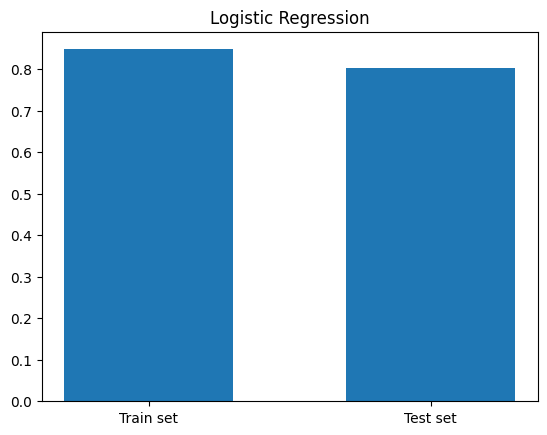

In [ ]:
plt.bar(["Train set", "Test set"], [accuracy_train, accuracy_test], width =.6)
plt.title("Logistic Regression")
plt.show()

### 3.3 Model evaluation

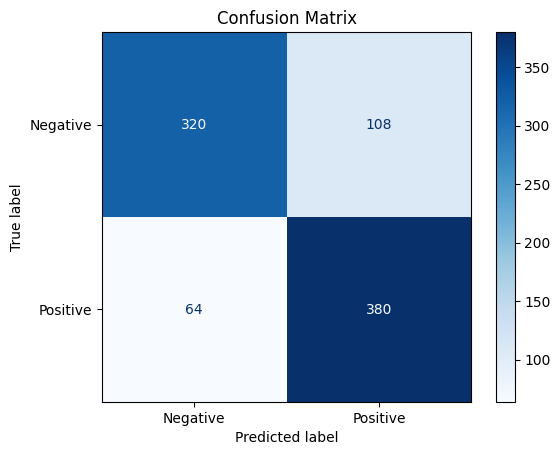

In [ ]:
from sklearn.metrics import ConfusionMatrixDisplay, accuracy_score, precision_score, recall_score, f1_score

disp = ConfusionMatrixDisplay.from_predictions(
    y_test,
    y_pred_test,
    display_labels=["Negative", "Positive"],
    cmap=plt.cm.Blues
)
plt.title("Confusion Matrix")
plt.show()

In [ ]:
accuracy = accuracy_score(y_test, y_pred_test)
precision = precision_score(y_test, y_pred_test)
recall = recall_score(y_test, y_pred_test)
f1 = f1_score(y_test, y_pred_test)

print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-score: {f1:.4f}")

Accuracy: 0.8028
Precision: 0.7787
Recall: 0.8559
F1-score: 0.8155
